<a href="https://colab.research.google.com/github/rjmcoder/CNN/blob/main/mnist_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist           # mnist dataset is already available in keras
from tensorflow.keras.utils import to_categorical     # helps convert data into categories --> one-hot encoding

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # mnist dataset is already structured as x_train, y_train, x_test, y_test in keras

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]
single_image.shape

(28, 28)

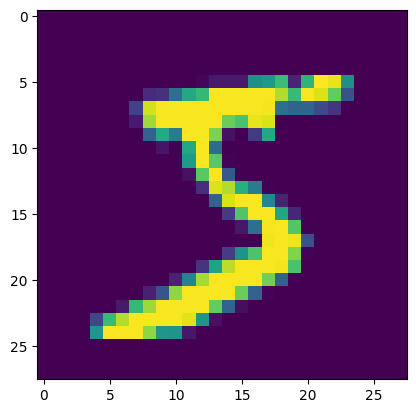

In [6]:
plt.imshow(single_image)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Need to convert the output (y_train and y_test) to categories. Currently the output is one array, if we feed this to our training, then the model would interpret this as continuous data and once trained it could potentially give outputs like 5.5, 6.8, etc. and clearly our output should be nothing other then integers from 0-9. Thus, we need to convert the output such that each digit has its own column, and it one-hot encoded.

In [8]:
# lets convert the output to categories (one-hot encoding)
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [9]:
# currently the min/max in our images is from 0-255
print(f"image min pixel value: {single_image.min()}")
print(f"image max pixel value: {single_image.max()}")

image min pixel value: 0
image max pixel value: 255


In [10]:
# lets normalize this to between  0-1
x_train = x_train/255
x_test = x_test/255
scaled_image = x_train[0]
print(f"image normalized min pixel value: {scaled_image.min()}")
print(f"image normalized max pixel value: {scaled_image.max()}")

image normalized min pixel value: 0.0
image normalized max pixel value: 1.0


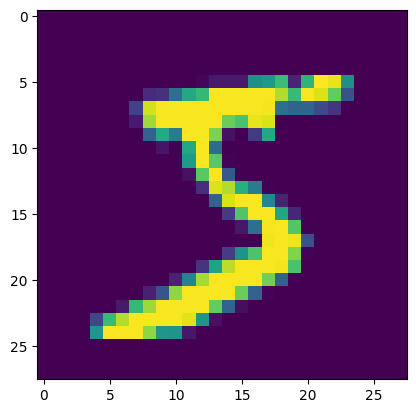

In [11]:
# lets make sure the scaled image is still the same as before
plt.imshow(scaled_image)

In [12]:
# batch size, width, height, color channel
x_train = x_train.reshape(60000, 28, 28, 1)

In [14]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [15]:
from tensorflow.keras.models import Sequential      # building the model sequentially by adding layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

# lets start real simple with 1 conv layer and 1 pooling layer.

# filters are usually powers of 2, stride will be default of (1,1), padding is default of VALID since 28%4 (image size / kernel size) = 0
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))  # input_shape is a MUST parameter determined by your data, (filters, kernel_size, activation) are hyperparameters that can be played around with.
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())        # MUST have atleast 1 flatten layer thus this layer should be present somewhere in the network

model.add(Dense(128, activation='relu'))    # can be played around with and have as many or as little Dense layers, with as many or as little neurons (128 here) as needed

# output layer, we have 10 final classes (0-9 digits), softmax --> since it is multi-class problem
model.add(Dense(10, activation='softmax'))        # MUST be present and should correspond to the number of classes present in your data

# keras.io/metrics for all the metrics available
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [24]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1479 - accuracy: 0.9555 - val_loss: 0.0561 - val_accuracy: 0.9815
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0505 - accuracy: 0.9852 - val_loss: 0.0408 - val_accuracy: 0.9871
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0337 - accuracy: 0.9889 - val_loss: 0.0395 - val_accuracy: 0.9874
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.0402 - val_accuracy: 0.9863


In [27]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.147917,0.955533,0.056143,0.9815
1,0.050499,0.985200,0.040849,0.9871
2,0.033661,0.988933,0.039462,0.9874
3,0.022680,0.992817,0.040172,0.9863


<Axes: >

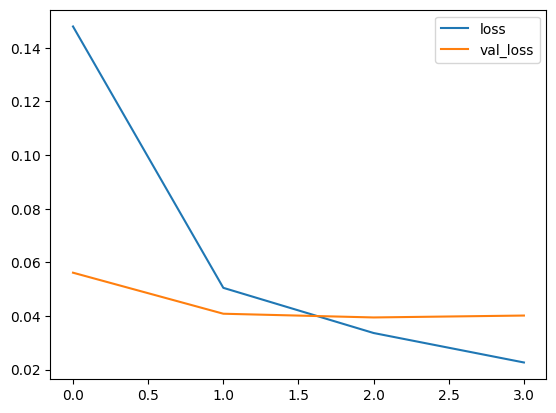

In [28]:
# lets plot training loss and val_loss
metrics[['loss', 'val_loss']].plot()

<Axes: >

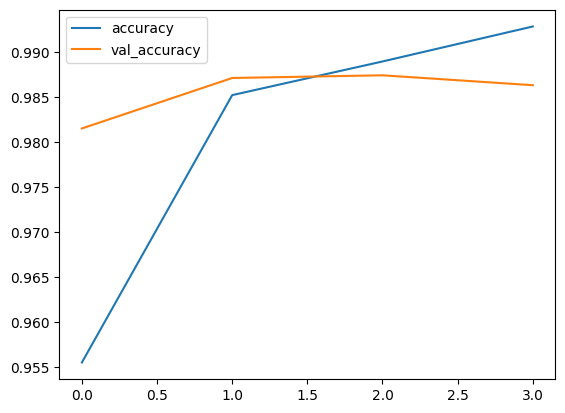

In [29]:
# lets plot training accuracy and val_accuracy
metrics[['accuracy', 'val_accuracy']].plot()

In [30]:
model.metrics_names

['loss', 'accuracy']

In [32]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.04017245024442673, 0.986299991607666]

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
# predictions = model.predict_classes(x_test)

predict_x=model.predict(x_test)
predictions=np.argmax(predict_x,axis=1)

313/313 [==============================] - 1s 5ms/step


In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [40]:
confusion_matrix(y_test, predictions)

array([[ 976,    0,    0,    1,    0,    1,    2,    0,    0,    0],
       [   0, 1130,    1,    1,    0,    1,    1,    0,    1,    0],
       [   3,    3, 1012,    6,    1,    0,    1,    4,    2,    0],
       [   0,    0,    0, 1004,    0,    5,    0,    1,    0,    0],
       [   0,    0,    2,    0,  973,    0,    3,    0,    1,    3],
       [   0,    0,    0,    6,    0,  884,    1,    0,    1,    0],
       [   6,    4,    0,    0,    1,    9,  935,    0,    3,    0],
       [   1,    3,    5,    2,    0,    0,    0, 1012,    1,    4],
       [   3,    0,    2,    5,    0,    3,    1,    3,  953,    4],
       [   1,    2,    0,    1,    6,   11,    0,    1,    3,  984]])

In [41]:
# lets vidualize it
import seaborn as sns

<Axes: >

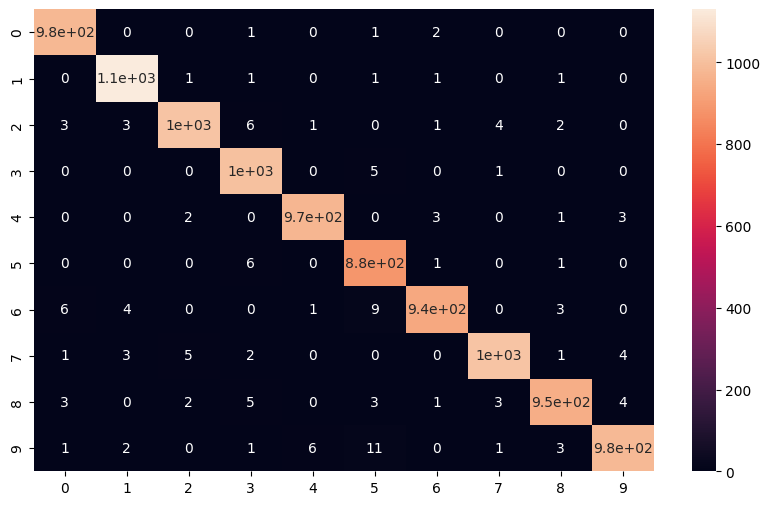

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

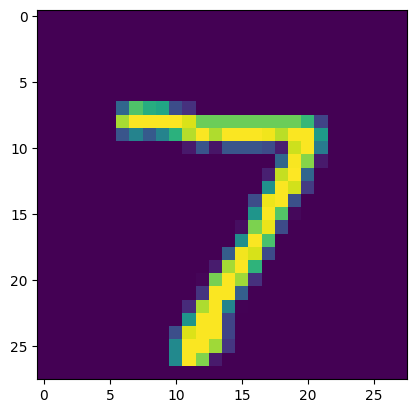

In [46]:
# predict a single image
my_number = x_test[0]
plt.imshow(my_number.reshape(28, 28))

In [48]:
# num_images, width, height, color_channels
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

1/1 [==============================] - 0s 20ms/step


array([7])